### Imports

In [1]:
from scipy.special import ellipe as ellipse
from scipy.special import erf as erf
import numpy as np
import matplotlib.pyplot as plt

# Interpolation Question 2

### Part a

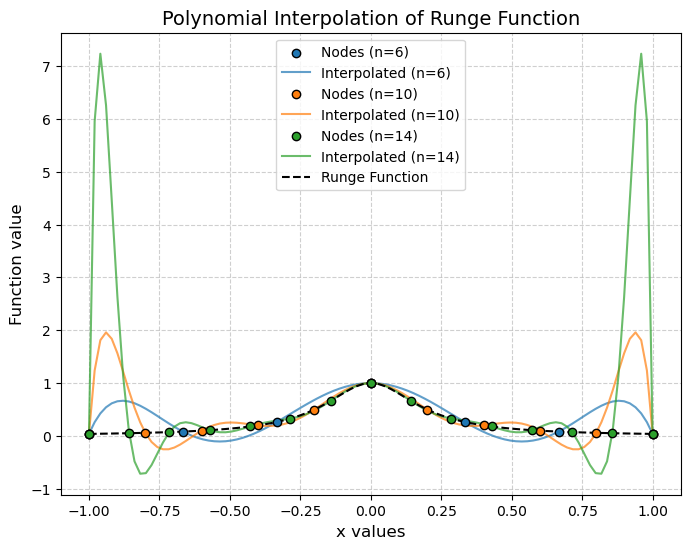

In [2]:
def runge_function(x_values):
    return 1 / (1 + 25 * x_values**2)

# Part a
x_smooth = np.linspace(-1, 1, 100)
n_vals = [6, 10, 14]
poly_interp_list = []

plt.figure(figsize=(8, 6))

for n in n_vals:
    x_list = []
    points = []
    
    for i in range(0, n+1):
        x_values = 2 * i / n - 1
        point = runge_function(x_values)
        points.append(point)
        x_list.append(x_values)

    # Compute interpolation polynomial
    poly_coeffs = np.polyfit(x_list, points, n)
    poly_interp = np.polyval(poly_coeffs, x_smooth)
    poly_interp_list.append(poly_interp)

    # Plot interpolation points and curves
    plt.scatter(x_list, points, marker='o', label=f'Nodes (n={n})', edgecolors='black', zorder=3)
    plt.plot(x_smooth, poly_interp, linestyle='-', alpha=0.7, label=f'Interpolated (n={n})')

# True function plot
y_true = runge_function(x_smooth)
plt.plot(x_smooth, y_true, 'k--', label='Runge Function', linewidth=1.5)

# Labels
plt.xlabel('x values', fontsize=12)
plt.ylabel('Function value', fontsize=12)
plt.title('Polynomial Interpolation of Runge Function', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Part b

In [3]:
# Part b
max_errors_list = [np.max(np.abs(y_true - p)) for p in poly_interp_list]

# Display max errors
print("Maximum interpolation errors:", max_errors_list)

Maximum interpolation errors: [0.6164015686420357, 1.9154342696798574, 7.189298471976274]


### Part c

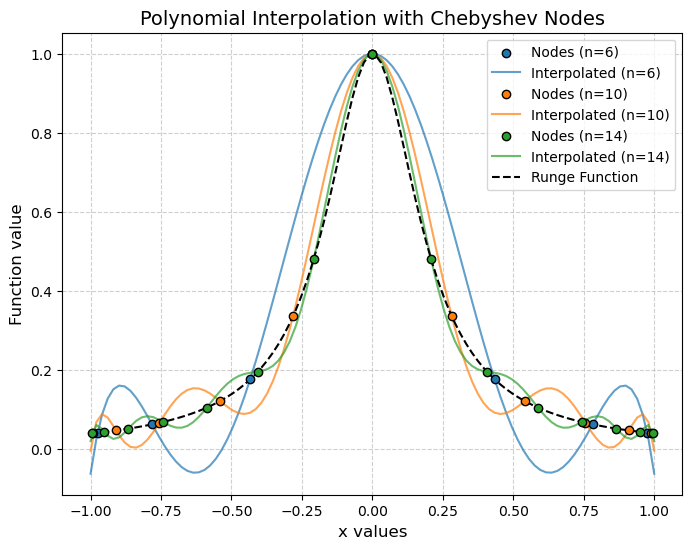

Maximum interpolation errors: [0.2641051307764354, 0.10902564197573905, 0.04608936896631993]


In [4]:
# Part c (repl a)
a, b = -1, 1
x_smooth = np.linspace(-1, 1, 100)
n_vals = [6, 10, 14]
poly_interp_list = []

plt.figure(figsize=(8, 6))

for n in n_vals:
    x_list = []
    points = []
    
    for i in range(0, n+1):
        x_values = (a + b) / 2 + (b - a) / 2 * np.cos((2 * i + 1) * np.pi / (2 * (n + 1)))
        point = runge_function(x_values)
        points.append(point)
        x_list.append(x_values)

    # Compute interpolation polynomial
    poly_coeffs = np.polyfit(x_list, points, n)
    poly_interp = np.polyval(poly_coeffs, x_smooth)
    poly_interp_list.append(poly_interp)

    # Plot interpolation points and curves
    plt.scatter(x_list, points, marker='o', label=f'Nodes (n={n})', edgecolors='black', zorder=3)
    plt.plot(x_smooth, poly_interp, linestyle='-', alpha=0.7, label=f'Interpolated (n={n})')

# True function plot
y_true = runge_function(x_smooth)
plt.plot(x_smooth, y_true, 'k--', label='Runge Function', linewidth=1.5)

# Labels and aesthetics
plt.xlabel('x values', fontsize=12)
plt.ylabel('Function value', fontsize=12)
plt.title('Polynomial Interpolation with Chebyshev Nodes', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Part b (repl b)
max_errors_list = [np.max(np.abs(y_true - p)) for p in poly_interp_list]

# Display max errors
print("Maximum interpolation errors:", max_errors_list)

# Integration Question 1

### Here we compute $$ \int_{-\sigma k}^{\sigma k} f(x) dx \approx 2 \cdot \frac{h}{3} \left[ f_0 + 4\sum_{\substack{i=1 \\ i \text{ odd}}}^{N-1} + 2\sum_{\substack{i=2 \\ i \text{ even}}}^{N-2} + f_N\right]$$

In [5]:
def normal_pdf(t):
    """
    Standardized normal probability density function
    """
    return(1 / np.sqrt(2 * np.pi)) * np.exp(-t**2 / 2)

def simpson_rule(f, a, b, N):
    """
    We approximate the integral of f form a to b using Simpson's Composite Rule,
    Note that N must be even
    """
    if N%2 != 0:
        raise ValueError("N must be even")

    h = (b - a)/N
    s = f(a) + f(b)

    #We apply Simpson's coefficient

    for i in range(1,N):
        t = a + i*h
        if i%2 == 0:
            s += 2 * f(t)
        else:
            s += 4 * f(t)

    return (h/3) * s

#Std value 
sigma = 1.0

#Values of k
k_vals = [1,2,3]

#Number of sub-intervals
N = 1000

print("Probability that a normally distributed variable lies in:")
for k in k_vals:
    #We recall the variable change x = sigma * t
    #Remember to * 2 for symmetry
    integral_hlf = simpson_rule(normal_pdf, 0, k, N)
    probability = 2 * integral_hlf
    print(f" [{-k*sigma}, {k*sigma}] ≈ {probability:.6f}")

Probability that a normally distributed variable lies in:
 [-1.0, 1.0] ≈ 0.682689
 [-2.0, 2.0] ≈ 0.954500
 [-3.0, 3.0] ≈ 0.997300


### Comparing to the actual values using the error function $$ \Phi(x) = \frac{1}{2} \left[ 1 + erf(\frac{x}{\sqrt{2}}) \right ]$$

In [6]:
def exact_normal_probability(k):
    return erf(k / np.sqrt(2))

for k in k_vals:
    prob = exact_normal_probability(k)
    print(f"Exact probability that X lies in [ -{k}, {k}]: {prob:.6f}")

Exact probability that X lies in [ -1, 1]: 0.682689
Exact probability that X lies in [ -2, 2]: 0.954500
Exact probability that X lies in [ -3, 3]: 0.997300


# Integration Question 2

## Using SciPy

### Here we compute the elliptic integral of the second kind,$$  L = 4 \cdot 3\int_{0}^{\frac{\pi}{2}} \sqrt{1 - e^2 \cos^2 t}\,\mathrm{d}t |_{e = \frac{\sqrt{5}}{9}} = 12 \cdot E\ \Bigl(\tfrac{\sqrt{5}}{3}\Bigr)$$

In [7]:
def ellipse_perimeter_scipy(a, b):
    """
    Uses scipy.special.ellipe to compute 4*a*E(e^2),
    where e^2 = 1 - (b^2 / a^2).
    """
    esquared = 1 - (b**2 / a**2)  # e^2
    return 4 * a * ellipse(esquared)

approx_length_1 = ellipse_perimeter_scipy(3,2)
print(f"Length of the graph with SciPy: {approx_length_1:.6f}")

Length of the graph with SciPy: 15.865440


## Using the trapezodial rule

### Here we compute $$ L = 4 \int_{0}^{\frac{\pi}{2}}  \sqrt{3^2\,\sin^2 t + 2^2\,\cos^2 t}\,\mathrm{d}t $$

In [8]:
def ellipse_perimeter_direct(a, b, n=10_000):
    """
    We numerically approximate the ellipse perimeter via direct integration
    using the trapezoidal rule.
    """
    # Create a grid from 0 to pi/2
    t = np.linspace(0, np.pi/2, n)
    # Evaluate the integrand
    integrand = np.sqrt(a**2 * np.sin(t)**2 + b**2 * np.cos(t)**2)
    # Approximate the integral using the trapezoidal rule
    quarter_arc_length = np.trapz(integrand, t)
    # Multiply by 4 to get the full perimeter
    return 4 * quarter_arc_length

approx_length_2 = ellipse_perimeter_direct(3, 2)
print(f"Length of the graph using trapezodial: {approx_length_2:.6f}")

Length of the graph using trapezodial: 15.865440
